<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data_add_delta_(0)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_0'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,28.828791,85.073801,86.770474,43.994255,-1.281194,253.386128,254.499365,-1.113238
1,0.0,1.0,45.447381,58.181881,47.293837,73.757464,0.547509,235.228072,234.665499,0.562572
2,0.0,2.0,89.139827,27.364930,53.906692,63.974438,2.196118,246.582005,244.536435,2.045569
3,0.0,3.0,86.676525,57.564418,71.570029,51.143423,0.976949,277.931343,277.005288,0.926056
4,0.0,4.0,57.187009,30.262371,98.213124,58.828597,-0.654874,253.836226,254.466256,-0.630029
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,36.149467,41.407859,20.708114,42.071698,-0.685789,149.651349,150.497465,-0.846115
249996,999.0,246.0,42.049910,52.004889,53.107387,73.720719,0.127896,231.010801,230.972250,0.038551
249997,999.0,247.0,41.808670,60.509642,34.394472,60.211459,1.360854,208.285097,207.006959,1.278138
249998,999.0,248.0,87.722333,27.911377,69.719039,83.346122,-0.290961,278.407910,278.982252,-0.574342


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    28.828791  85.073801  86.770474  43.994255 -1.281194  253.386128   
      1.0    45.447381  58.181881  47.293837  73.757464  0.547509  235.228072   
      2.0    89.139827  27.364930  53.906692  63.974438  2.196118  246.582005   
      3.0    86.676525  57.564418  71.570029  51.143423  0.976949  277.931343   
      4.0    57.187009  30.262371  98.213124  58.828597 -0.654874  253.836226   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  36.149467  41.407859  20.708114  42.071698 -0.685789  149.651349   
      246.0  42.049910  52.004889  53.107387  73.720719  0.127896  231.010801   
      247.0  41.808670  60.509642  34.394472  60.211459  1.360854  208.285097   
      248.0  87.722333  27.911377  69.719039  83.346122 -0.290961  278.407910   
      249.0  31.770335  46.244687  70.464392  25.418085  1.229502  185.127002   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    254.499365 -1.113238  
      1.0    234.665499  0.562572  
      2.0    244.536435  2.045569  
      3.0    277.005288  0.926056  
      4.0    254.466256 -0.630029  
...                 ...       ...  
999.0 245.0  150.497465 -0.846115  
      246.0  230.972250  0.038551  
      247.0  207.006959  1.278138  
      248.0  278.982252 -0.574342  
      249.0  184.064447  1.062554  

[250000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    28.828791  85.073801  86.770474  43.994255 -1.281194  253.386128   
      1.0    45.447381  58.181881  47.293837  73.757464  0.547509  235.228072   
      2.0    89.139827  27.364930  53.906692  63.974438  2.196118  246.582005   
      3.0    86.676525  57.564418  71.570029  51.143423  0.976949  277.931343   
      4.0    57.187009  30.262371  98.213124  58.828597 -0.654874  253.836226   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  36.149467  41.407859  20.708114  42.071698 -0.685789  149.651349   
      246.0  42.049910  52.004889  53.107387  73.720719  0.127896  231.010801   
      247.0  41.808670  60.509642  34.394472  60.211459  1.360854  208.285097   
      248.0  87.722333  27.911377  69.719039  83.346122 -0.290961  278.407910   
      249.0  31.770335  46.244687  70.464392  25.418085  1.229502  185.127002   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    254.499365 -1.113238  
      1.0    234.665499  0.562572  
      2.0    244.536435  2.045569  
      3.0    277.005288  0.926056  
      4.0    254.466256 -0.630029  
...                 ...       ...  
999.0 245.0  150.497465 -0.846115  
      246.0  230.972250  0.038551  
      247.0  207.006959  1.278138  
      248.0  278.982252 -0.574342  
      249.0  184.064447  1.062554  

[250000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,28.828791,85.073801,86.770474,43.994255,-1.281194,253.386128,254.499365,-1.113238
1,0.0,1.0,45.447381,58.181881,47.293837,73.757464,0.547509,235.228072,234.665499,0.562572
2,0.0,2.0,89.139827,27.364930,53.906692,63.974438,2.196118,246.582005,244.536435,2.045569
3,0.0,3.0,86.676525,57.564418,71.570029,51.143423,0.976949,277.931343,277.005288,0.926056
4,0.0,4.0,57.187009,30.262371,98.213124,58.828597,-0.654874,253.836226,254.466256,-0.630029
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,36.149467,41.407859,20.708114,42.071698,-0.685789,149.651349,150.497465,-0.846115
249996,999.0,246.0,42.049910,52.004889,53.107387,73.720719,0.127896,231.010801,230.972250,0.038551
249997,999.0,247.0,41.808670,60.509642,34.394472,60.211459,1.360854,208.285097,207.006959,1.278138
249998,999.0,248.0,87.722333,27.911377,69.719039,83.346122,-0.290961,278.407910,278.982252,-0.574342


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    28.828791  85.073801  86.770474  43.994255 -1.281194  253.386128   
      1.0    45.447381  58.181881  47.293837  73.757464  0.547509  235.228072   
      2.0    89.139827  27.364930  53.906692  63.974438  2.196118  246.582005   
      3.0    86.676525  57.564418  71.570029  51.143423  0.976949  277.931343   
      4.0    57.187009  30.262371  98.213124  58.828597 -0.654874  253.836226   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  36.149467  41.407859  20.708114  42.071698 -0.685789  149.651349   
      246.0  42.049910  52.004889  53.107387  73.720719  0.127896  231.010801   
      247.0  41.808670  60.509642  34.394472  60.211459  1.360854  208.285097   
      248.0  87.722333  27.911377  69.719039  83.346122 -0.290961  278.407910   
      249.0  31.770335  46.244687  70.464392  25.418085  1.229502  185.127002   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    254.499365 -1.113238  
      1.0    234.665499  0.562572  
      2.0    244.536435  2.045569  
      3.0    277.005288  0.926056  
      4.0    254.466256 -0.630029  
...                 ...       ...  
999.0 245.0  150.497465 -0.846115  
      246.0  230.972250  0.038551  
      247.0  207.006959  1.278138  
      248.0  278.982252 -0.574342  
      249.0  184.064447  1.062554  

[250000 rows x 8 columns]

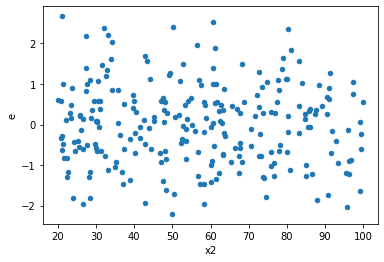

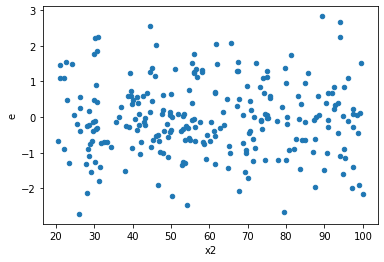

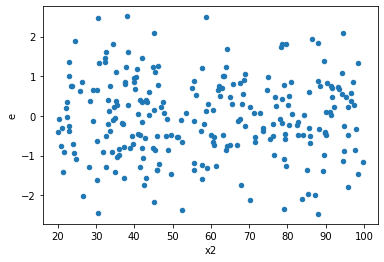

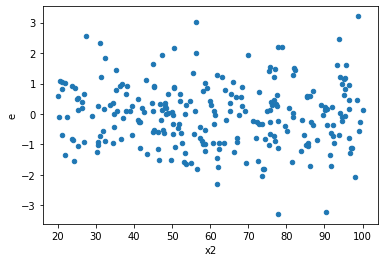

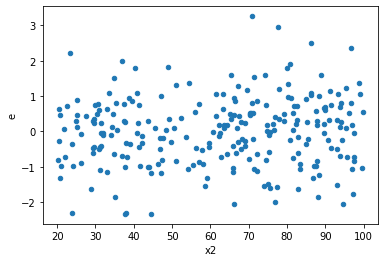

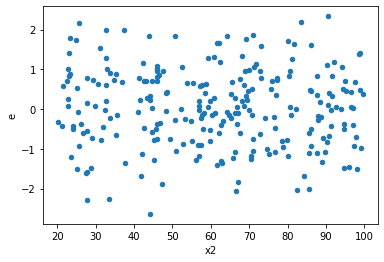

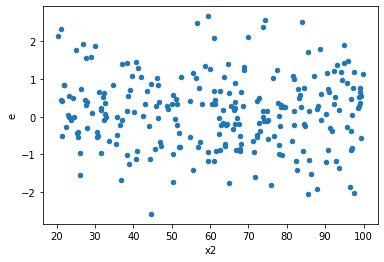

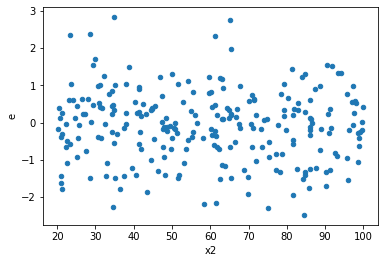

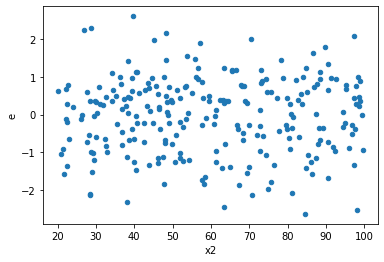

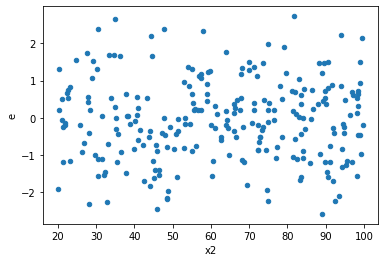

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3", "x4"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,115.0,127.0,110.36060089682522,147.49874990055113,0.959657399102828,1.1614074795318987,1.2102313602934593,0.29377458633223186,0.8531127068338841,0.14688729316611593,Reject005=1 : Homoscedasticity
4.0,109.0,133.0,93.16725635601772,131.4211443818478,0.8547454711561259,0.9881289051266752,1.1560504717154398,0.4239551768344114,0.7880224115827943,0.2119775884172057,Reject005=1 : Homoscedasticity
6.0,123.0,119.0,104.33045461156517,113.65047965884331,0.8482150781428063,0.9550460475533051,1.1259479725878119,0.5159519717422312,0.7420240141288844,0.2579759858711156,Reject005=1 : Homoscedasticity
7.0,112.0,130.0,101.2594017438656,119.76337004745129,0.9041018012845142,0.9212566926727023,1.0189745130070695,0.9144465986819803,0.5427767006590098,0.45722329934099015,Reject005=1 : Homoscedasticity
8.0,130.0,112.0,124.2760597485522,117.5158761775889,0.9559696903734785,1.049248894442758,1.0975754827884106,0.6139865268897333,0.6930067365551333,0.30699326344486666,Reject005=1 : Homoscedasticity
9.0,127.0,115.0,140.18135027421494,143.50306091724534,1.1037901596394877,1.2478527036282203,1.1305162423587698,0.5037604896968761,0.7481197551515619,0.2518802448484381,Reject005=1 : Homoscedasticity
10.0,133.0,109.0,129.40674570882157,136.75986205641422,0.9729830504422675,1.2546776335450847,1.2895164339962277,0.16912404120633617,0.9154379793968319,0.08456202060316809,Reject005=1 : Homoscedasticity
11.0,120.0,122.0,122.07622886814052,125.85243679818377,1.0173019072345044,1.031577350804785,1.014032651928362,0.9386355231381174,0.5306822384309413,0.4693177615690587,Reject005=1 : Homoscedasticity
12.0,136.0,106.0,126.0221511956642,117.62419387054213,0.9266334646740014,1.1096622063258692,1.197520107603991,0.33212823908025846,0.8339358804598708,0.16606411954012923,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,103.0,139.0,103.54043099113706,134.53766411391095,1.0052469028265734,0.9678968641288558,0.9628449104466813,0.8444750521066471,Reject005=1 : Homoscedasticity
1.0,123.0,119.0,131.0501926963823,120.42587285404883,1.0654487211087993,1.0119821248239398,0.9498177667065784,0.7767378411899043,Reject005=1 : Homoscedasticity
2.0,119.0,123.0,122.67943667957026,119.32656586314538,1.0309196359627752,0.97013468181419,0.9410381255452389,0.7395691637360327,Reject005=1 : Homoscedasticity
3.0,115.0,127.0,110.36060089682522,147.49874990055113,0.959657399102828,1.1614074795318987,1.2102313602934593,0.29377458633223186,Reject005=1 : Homoscedasticity
4.0,109.0,133.0,93.16725635601772,131.4211443818478,0.8547454711561259,0.9881289051266752,1.1560504717154398,0.4239551768344114,Reject005=1 : Homoscedasticity
5.0,123.0,119.0,118.44775957092082,111.10934273072156,0.9629899152107384,0.9336919557203492,0.9695760474459614,0.8645616850108315,Reject005=1 : Homoscedasticity
6.0,123.0,119.0,104.33045461156517,113.65047965884331,0.8482150781428063,0.9550460475533051,1.1259479725878119,0.5159519717422312,Reject005=1 : Homoscedasticity
7.0,112.0,130.0,101.2594017438656,119.76337004745129,0.9041018012845142,0.9212566926727023,1.0189745130070695,0.9144465986819803,Reject005=1 : Homoscedasticity
8.0,130.0,112.0,124.2760597485522,117.5158761775889,0.9559696903734785,1.049248894442758,1.0975754827884106,0.6139865268897333,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      946
Reject005=0 : Heteroscedasticity     54
Name: Result_test, dtype: int64